In [11]:
#most of the code is from https://github.com/jovsa/speed-challenge-2017
#i just changed some parts from skvideo to opencv and changed some file paths
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import csv
import cv2
from tqdm import tqdm
%matplotlib inline

# constants
TRAIN_VIDEO = 'train.mp4'
TEST_VIDEO = 'test.mp4'
CLEAN_IMGS_TRAIN = 'CLEAN_IMGS_TRAIN/'
CLEAN_IMGS_TEST = 'CLEAN_IMGS_TEST/'

train_frames = 20400
test_frames = 10798

train_y = list(pd.read_csv('train.txt', header=None).squeeze("columns"))
assert(len(train_y)==train_frames)

def dataset_constructor(video_loc, img_folder, tot_frames, dataset_type):
    meta_dict = {}

    tqdm.write('reading in video file...')
    tot_frames = train_frames
    cap = cv2.VideoCapture(video_loc)
    frames = []
    while True:
        ret, frame = cap.read()
        if frame is None:
            break
        else:
            frames.append(frame)
        
    tqdm.write('constructing dataset...')
    for idx, frame in enumerate(tqdm(frames)):    
        img_path = os.path.join(img_folder, str(idx)+'.jpg')
        frame_speed = float('NaN') if dataset_type == 'test' else train_y[idx]
        meta_dict[idx] = [img_path, idx, frame_speed]
        cv2.imwrite(img_path, frame)
        #skvideo.io.vwrite(img_path, frame)
    meta_df = pd.DataFrame.from_dict(meta_dict, orient='index')
    meta_df.columns = ['image_path', 'image_index', 'speed']
    
    tqdm.write('writing meta to csv')
    meta_df.to_csv(dataset_type+'_meta.csv', index=False)
    
    return "done dataset_constructor"

dataset_constructor(TRAIN_VIDEO, CLEAN_IMGS_TRAIN, train_frames, 'train')

dataset_constructor(TEST_VIDEO, CLEAN_IMGS_TEST, test_frames, 'test')

reading in video file...
constructing dataset...


100%|█████████████████████████████████████| 20400/20400 [03:19<00:00, 102.00it/s]


writing meta to csv
reading in video file...
constructing dataset...


100%|█████████████████████████████████████| 10798/10798 [01:00<00:00, 177.51it/s]


writing meta to csv


'done dataset_constructor'

               image_path  image_index      speed
0  CLEAN_IMGS_TRAIN/0.jpg            0  28.105569
1  CLEAN_IMGS_TRAIN/1.jpg            1  28.105569
2  CLEAN_IMGS_TRAIN/2.jpg            2  28.106527
3  CLEAN_IMGS_TRAIN/3.jpg            3  28.130404
4  CLEAN_IMGS_TRAIN/4.jpg            4  28.109243
speed: 28.105569
shape: (480, 640, 3)


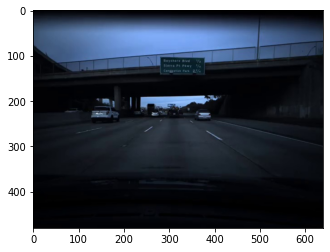

speed: 28.105569
shape: (480, 640, 3)


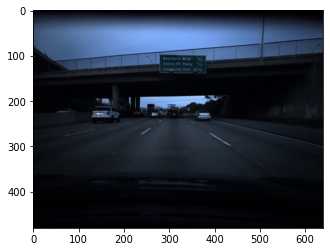

speed: 28.106527
shape: (480, 640, 3)


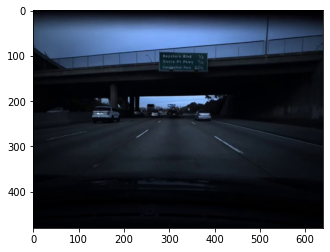

speed: 28.130404
shape: (480, 640, 3)


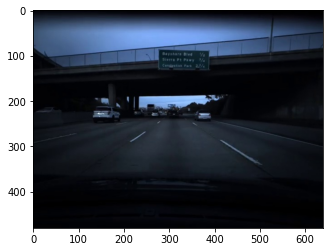

speed: 28.109243
shape: (480, 640, 3)


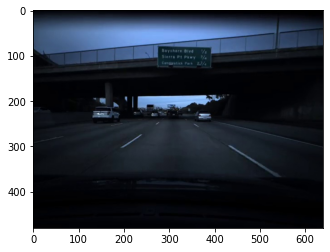

speed: 28.088572
shape: (480, 640, 3)


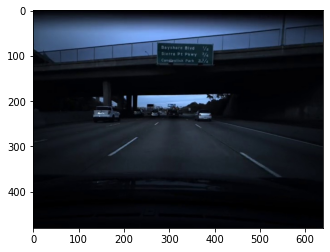

speed: 28.034211
shape: (480, 640, 3)


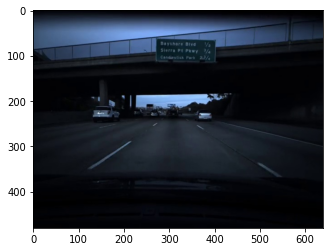

speed: 28.018491
shape: (480, 640, 3)


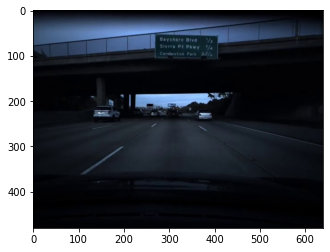

speed: 27.986624
shape: (480, 640, 3)


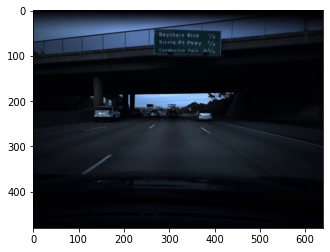

speed: 28.016352
shape: (480, 640, 3)


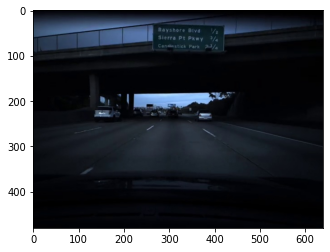

speed: 27.981986
shape: (480, 640, 3)


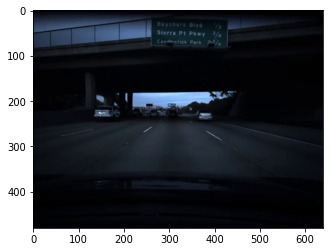

speed: 27.978625
shape: (480, 640, 3)


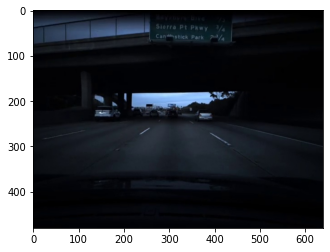

speed: 28.032331
shape: (480, 640, 3)


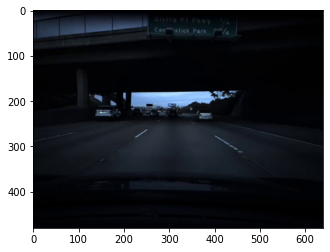

speed: 27.960219
shape: (480, 640, 3)


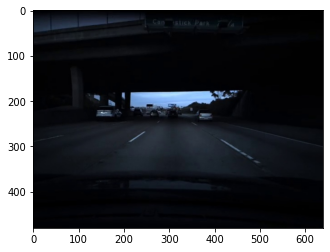

speed: 27.937178
shape: (480, 640, 3)


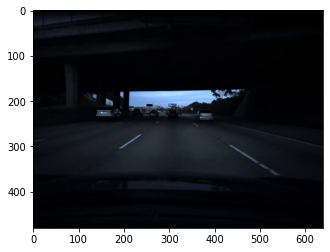

speed: 27.940599
shape: (480, 640, 3)


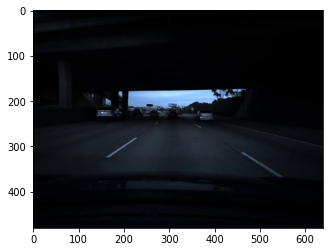

speed: 27.908579
shape: (480, 640, 3)


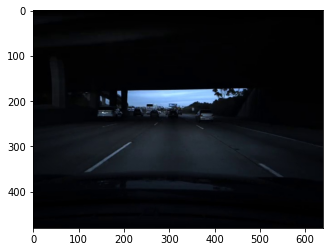

speed: 27.898606
shape: (480, 640, 3)


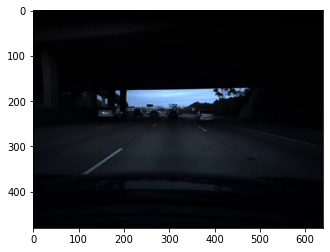

speed: 27.855982
shape: (480, 640, 3)


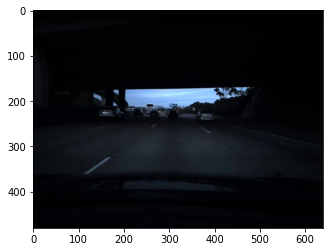

speed: 27.795581
shape: (480, 640, 3)


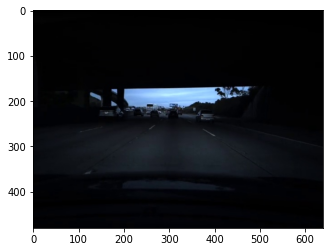

speed: 27.850634
shape: (480, 640, 3)


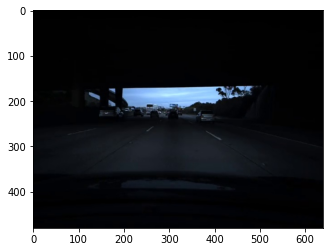

speed: 27.839349
shape: (480, 640, 3)


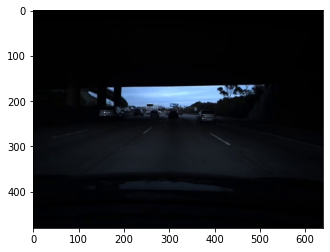

speed: 27.824348
shape: (480, 640, 3)


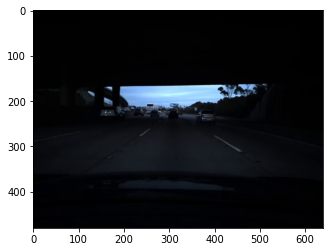

speed: 27.759608
shape: (480, 640, 3)


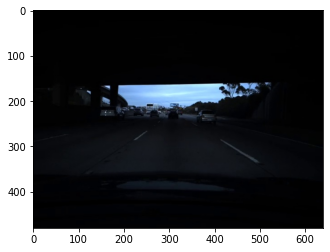

speed: 27.830055
shape: (480, 640, 3)


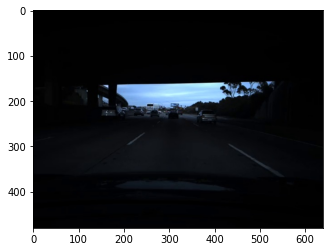

speed: 27.761886
shape: (480, 640, 3)


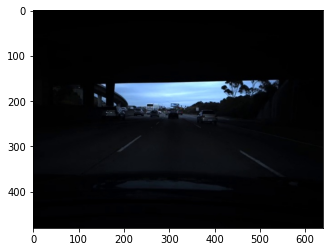

speed: 27.694763
shape: (480, 640, 3)


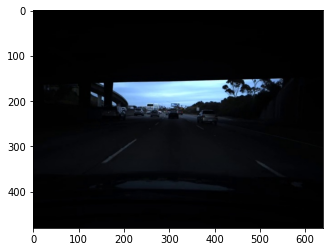

speed: 27.761203
shape: (480, 640, 3)


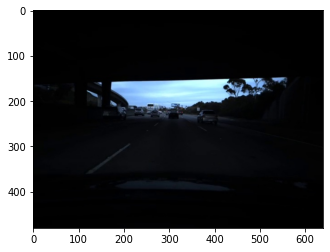

speed: 27.691932
shape: (480, 640, 3)


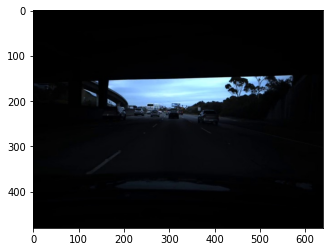

speed: 27.666086
shape: (480, 640, 3)


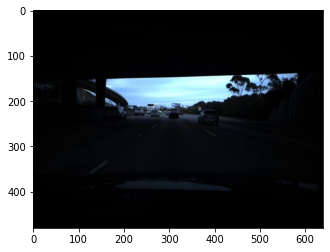

speed: 27.723912
shape: (480, 640, 3)


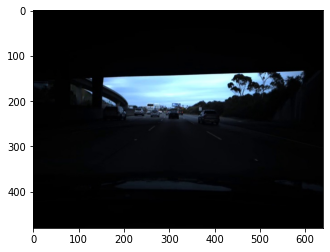

speed: 27.639469
shape: (480, 640, 3)


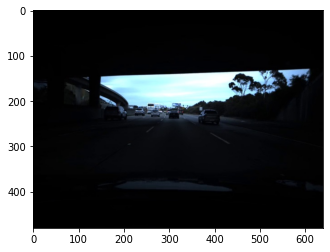

speed: 27.612874
shape: (480, 640, 3)


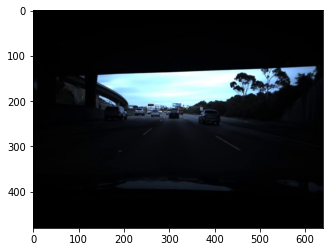

speed: 27.638534
shape: (480, 640, 3)


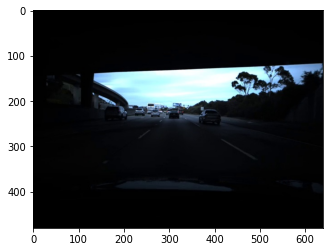

speed: 27.606098
shape: (480, 640, 3)


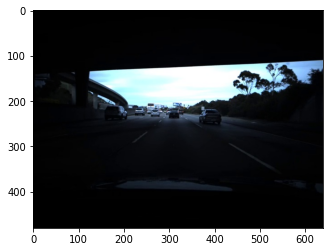

speed: 27.593209
shape: (480, 640, 3)


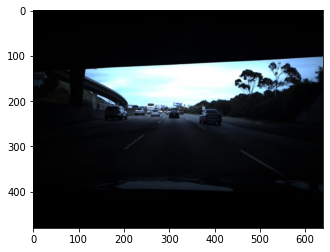

speed: 27.573926
shape: (480, 640, 3)


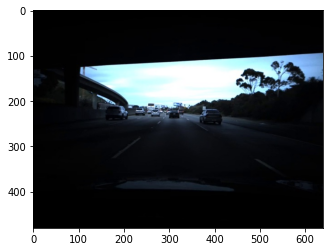

speed: 27.561151
shape: (480, 640, 3)


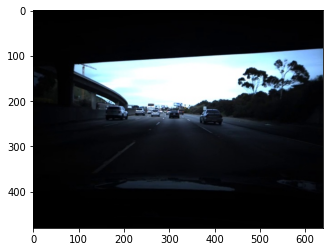

speed: 27.559232
shape: (480, 640, 3)


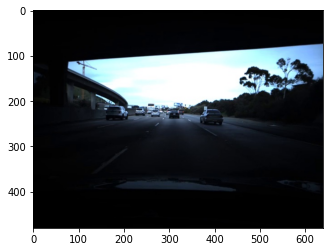

speed: 27.528067
shape: (480, 640, 3)


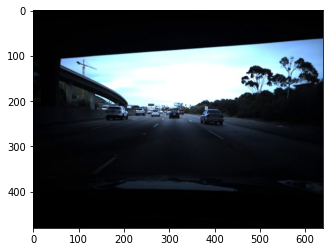

speed: 27.522542
shape: (480, 640, 3)


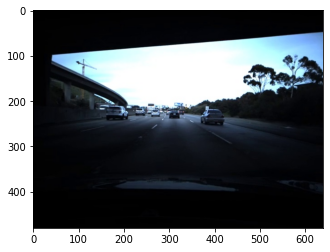

speed: 27.531058
shape: (480, 640, 3)


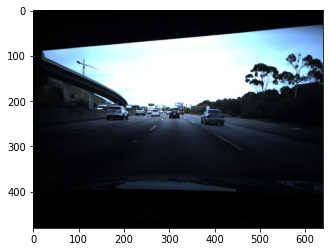

speed: 27.493015
shape: (480, 640, 3)


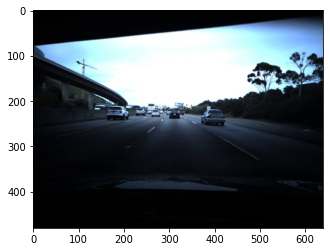

speed: 27.487706
shape: (480, 640, 3)


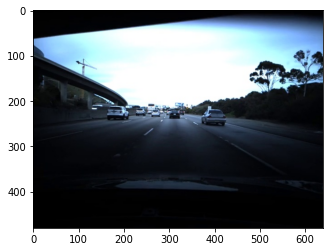

speed: 27.440943
shape: (480, 640, 3)


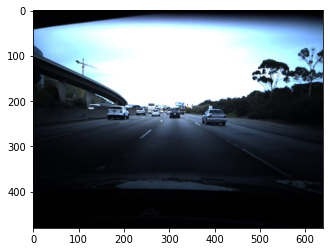

speed: 27.439646
shape: (480, 640, 3)


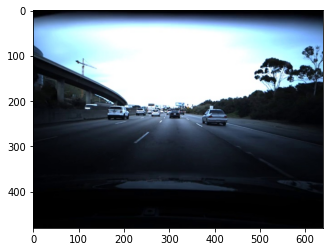

speed: 27.412907
shape: (480, 640, 3)


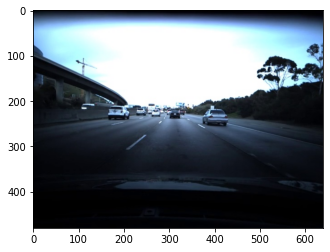

speed: 27.401744
shape: (480, 640, 3)


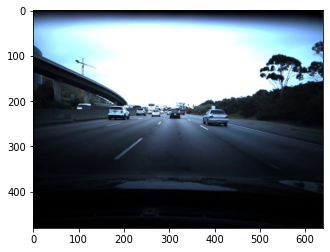

speed: 27.396007
shape: (480, 640, 3)


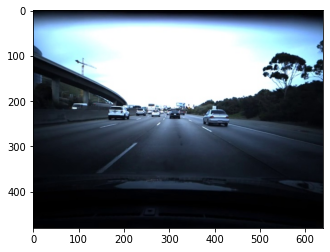

speed: 27.35751
shape: (480, 640, 3)


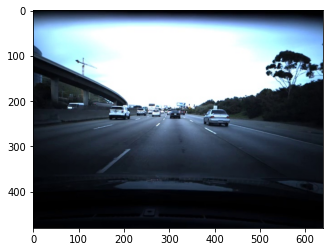

In [13]:
train_meta = pd.read_csv('train_meta.csv')
assert(train_meta.shape[0] == train_frames)
assert(train_meta.shape[1] == 3)

print(train_meta.head())

for i in range(50):
    print('speed:',train_meta['speed'][i] )
    img=mpimg.imread(train_meta['image_path'][i])
    print('shape:', img.shape)
    plt.imshow(img)
    plt.show()